### Fische

In diesem Datenset sind verschiedene Fischarten vorhanden.

Beschreibung der Daten:

| Name | Beschreibung |
|---|---|
| Species | Name der Fischart |
| Weight | Gewicht des Fisches in gr |
| Length1 | Vertikale Länge des Fisches in cm |
| Length2 | Diagonale Länge des Fisches in cm |
| Length3 | Querschnitt des Fisches in cm |
| Height | Größe des Fisches in cm |
| Width | Breite des Fisches in cm |

In [46]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [2]:
# load data
df = pd.read_csv("fish.csv")

### Durchführung Data Minung & EDA

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
# rename Length1 + 2 + 3 in Vertical, Diagonal and Cross
df = df.rename(columns={"Length1": "Vertical", "Length2": "Diagonal", "Length3": "Cross"})

In [7]:
df

,Species,Weight,Vertical,Diagonal,Cross,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### Fertigen Sie ein Pairplot mit Unterscheidung der Species an. Diskutieren Sie das Ergebnis.

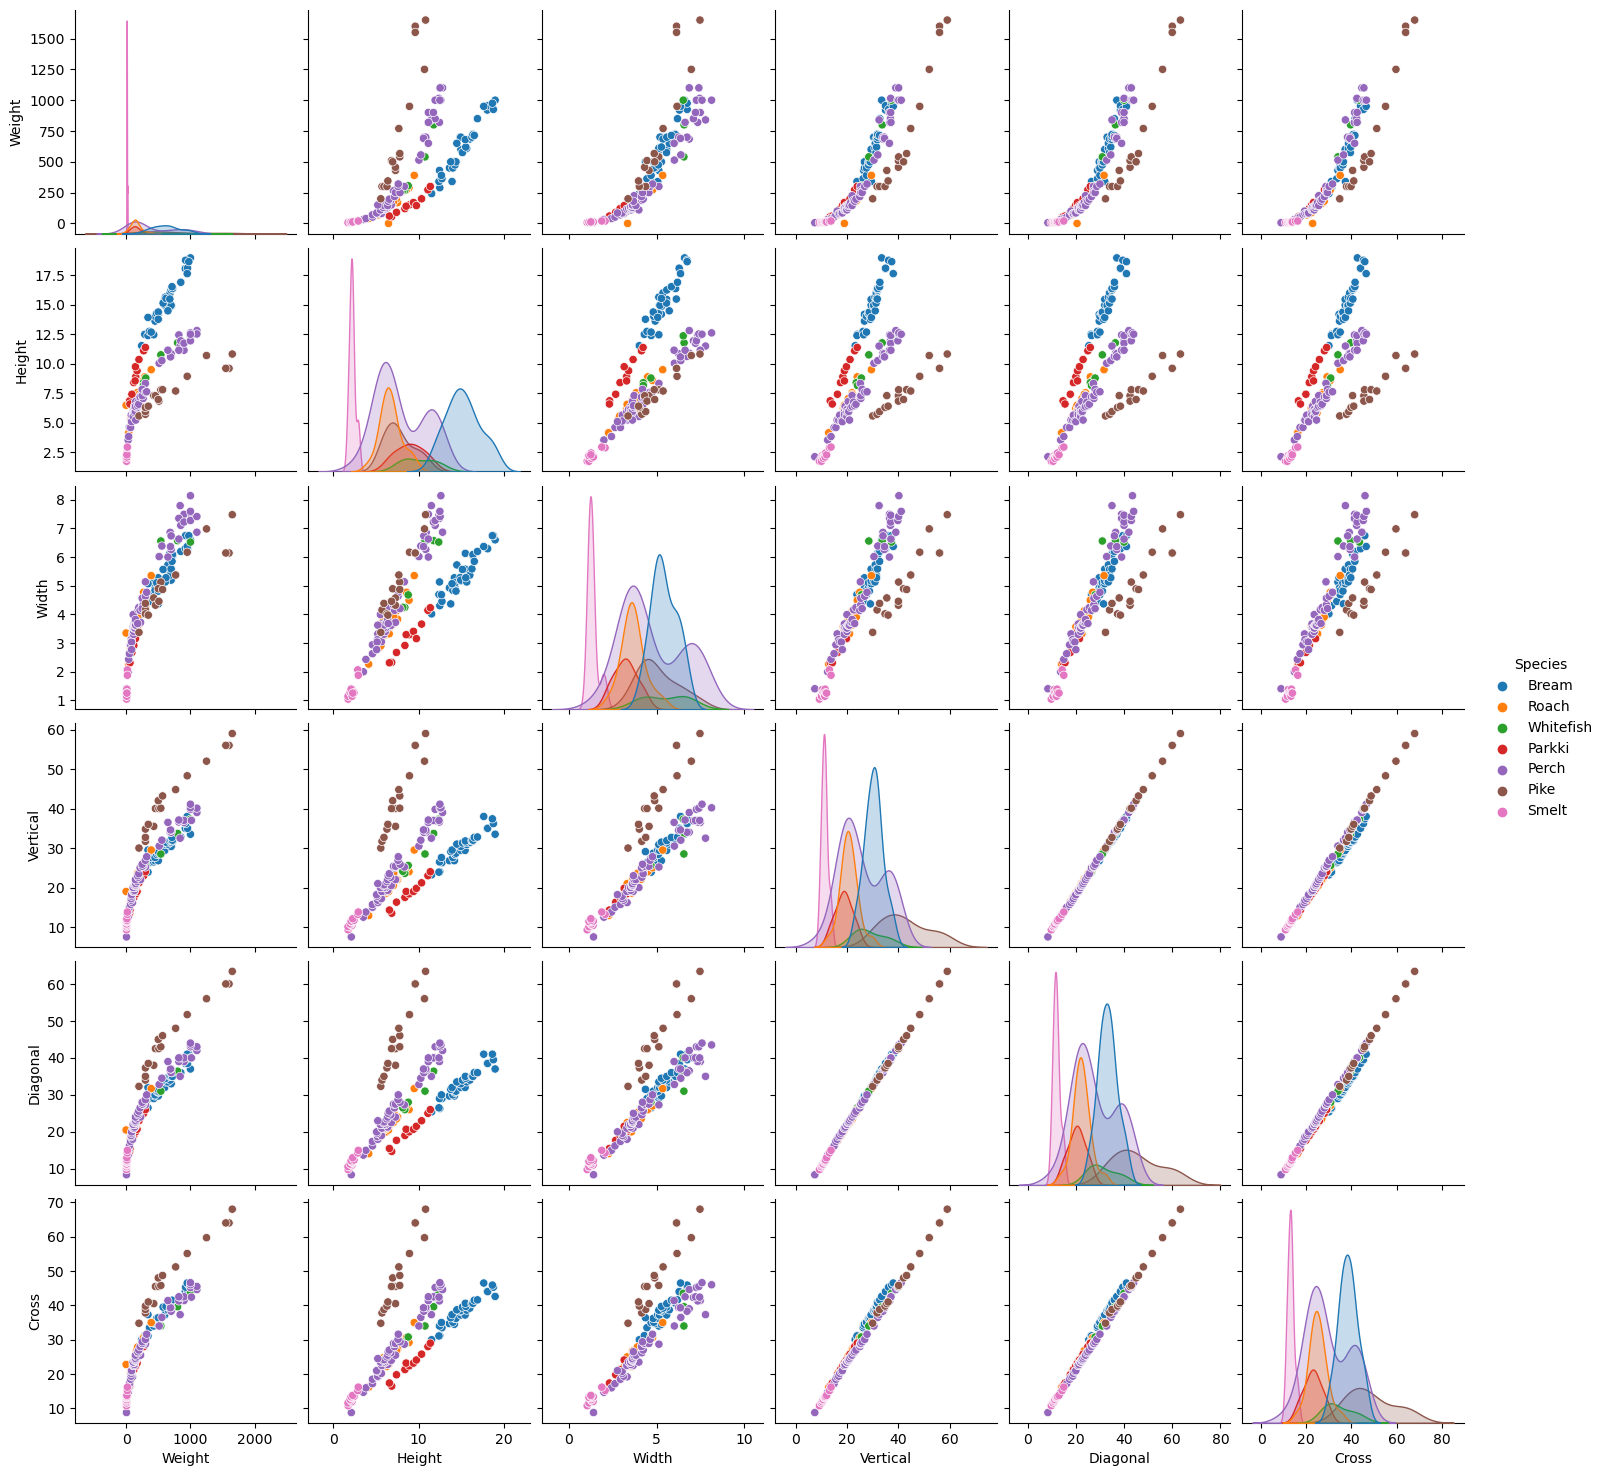

In [8]:
sns.pairplot(df, hue="Species", vars=["Weight", "Height", "Width", "Vertical", "Diagonal", "Cross"])

### Erstellen Sie je Species eine Correlationsmatrix visuell (wenn möglich Subplots verwenden). Werden Ihre Annahmen von dem Pairplot bestätigt?

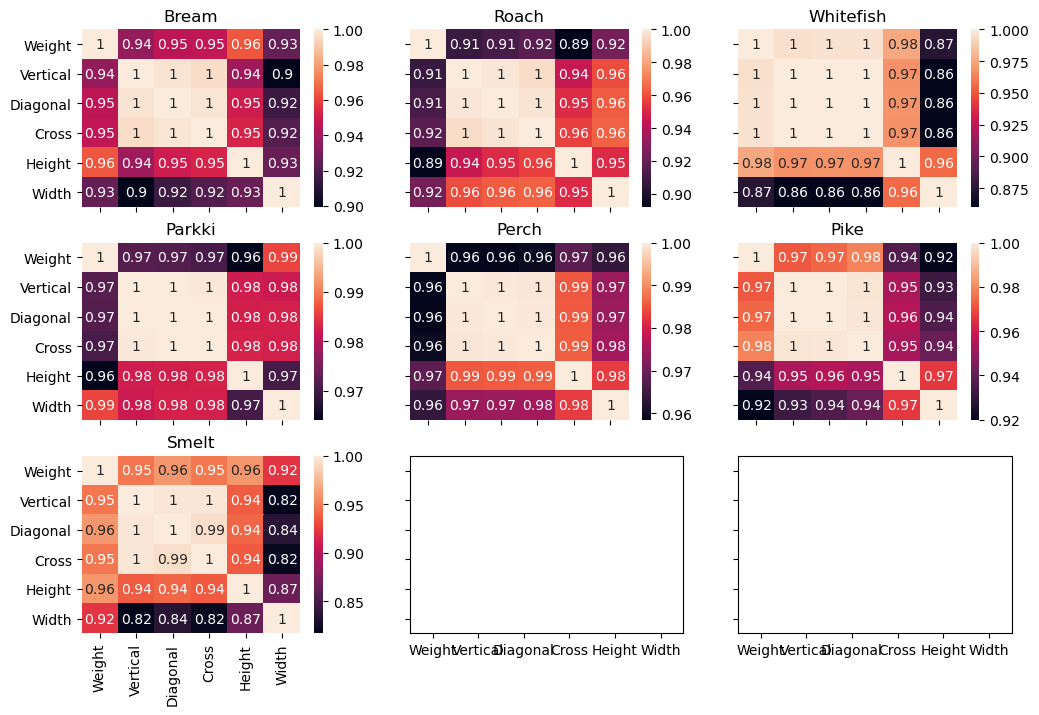

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True, sharex=True)
j = 0
for i, specie in enumerate(df.Species.unique()):
    sns.heatmap(df.loc[df["Species"] == specie].corr(), annot=True, ax=axes[j, i%3])
    axes[j, i%3].set_title(specie)
    if i%3 == 2: j += 1

### Wieviel Fische je Fischart existieren? Erstellen Sie ein Pie-Plot und eine deskriptive Statistik.

In [10]:
fishes = df.groupby("Species").count()["Weight"]
fishes

Species
Bream        35
Parkki       11
Perch        56
Pike         17
Roach        20
Smelt        14
Whitefish     6
Name: Weight, dtype: int64

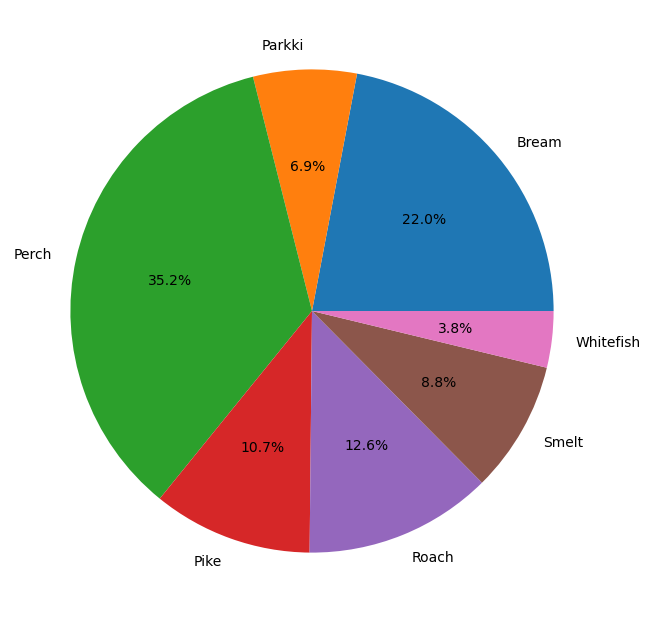

In [11]:
labels = sorted(list(df.Species.unique()))
fig1, ax1 = plt.subplots()
ax1.pie(fishes, labels=labels, autopct='%1.1f%%');

### Erstellen Sie für Weight, Vertical, Diagonal, Cross, Height und " je ein Plot indem je Species die Ausreißer feststellbar sind.

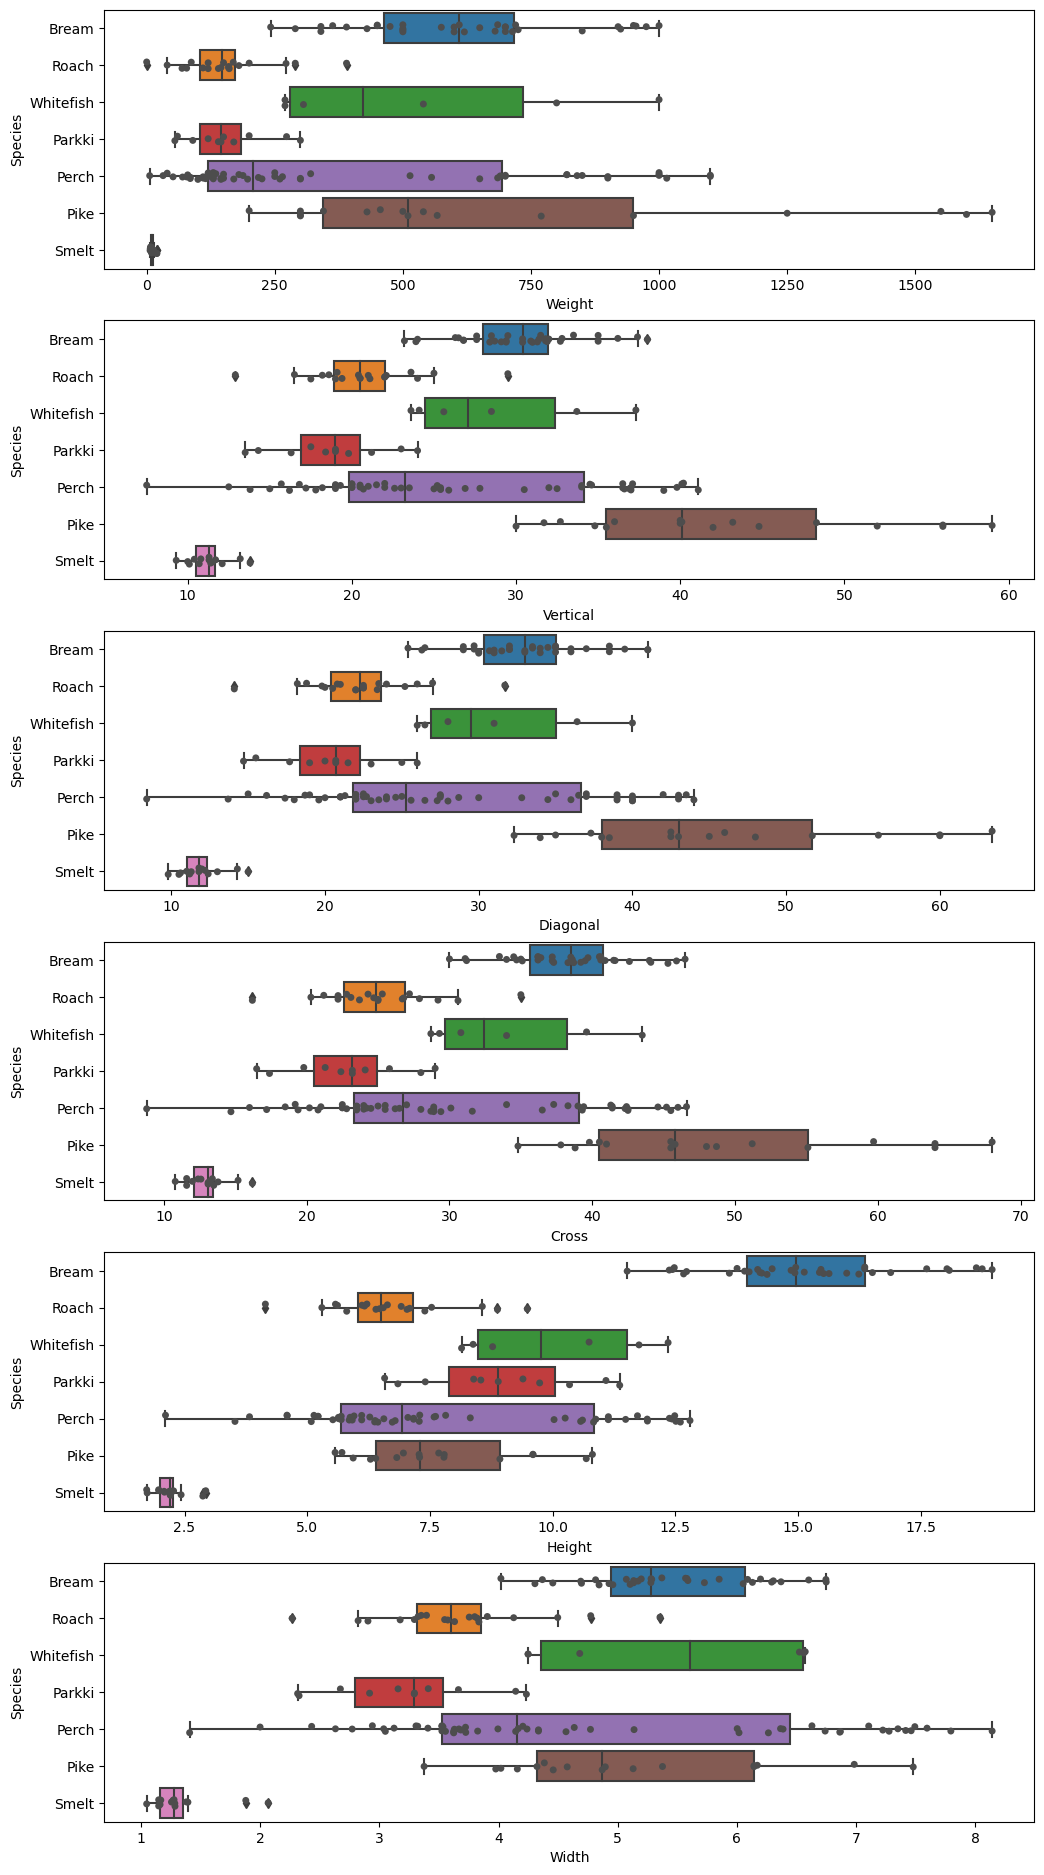

In [34]:
plt.rcParams['figure.figsize'] = [12, 24]
sizes = ["Weight", "Vertical", "Diagonal", "Cross", "Height", "Width"]
fig, axes = plt.subplots(nrows=6, ncols=1)

for i, size in enumerate(sizes):
    sns.boxplot(x=size, y="Species", data=df, ax=axes[i])
    sns.stripplot(x=size, y="Species", data=df, color=".3", ax=axes[i])

### Versuchen Sie 3 "lmplot" in ein Subplot darzustellen (z.B. Vertical/Weight, Diagonal/Height und Width/Weight. Jeweils in Unterscheidung mit Species)

Hinweis: der lmplot akzeptiert nicht ax. Daher muss eine andere Lösung gefunden werden. Dauert vermutlich etwas länger. Daher diese Aufgabe erst als Zusatz machen.

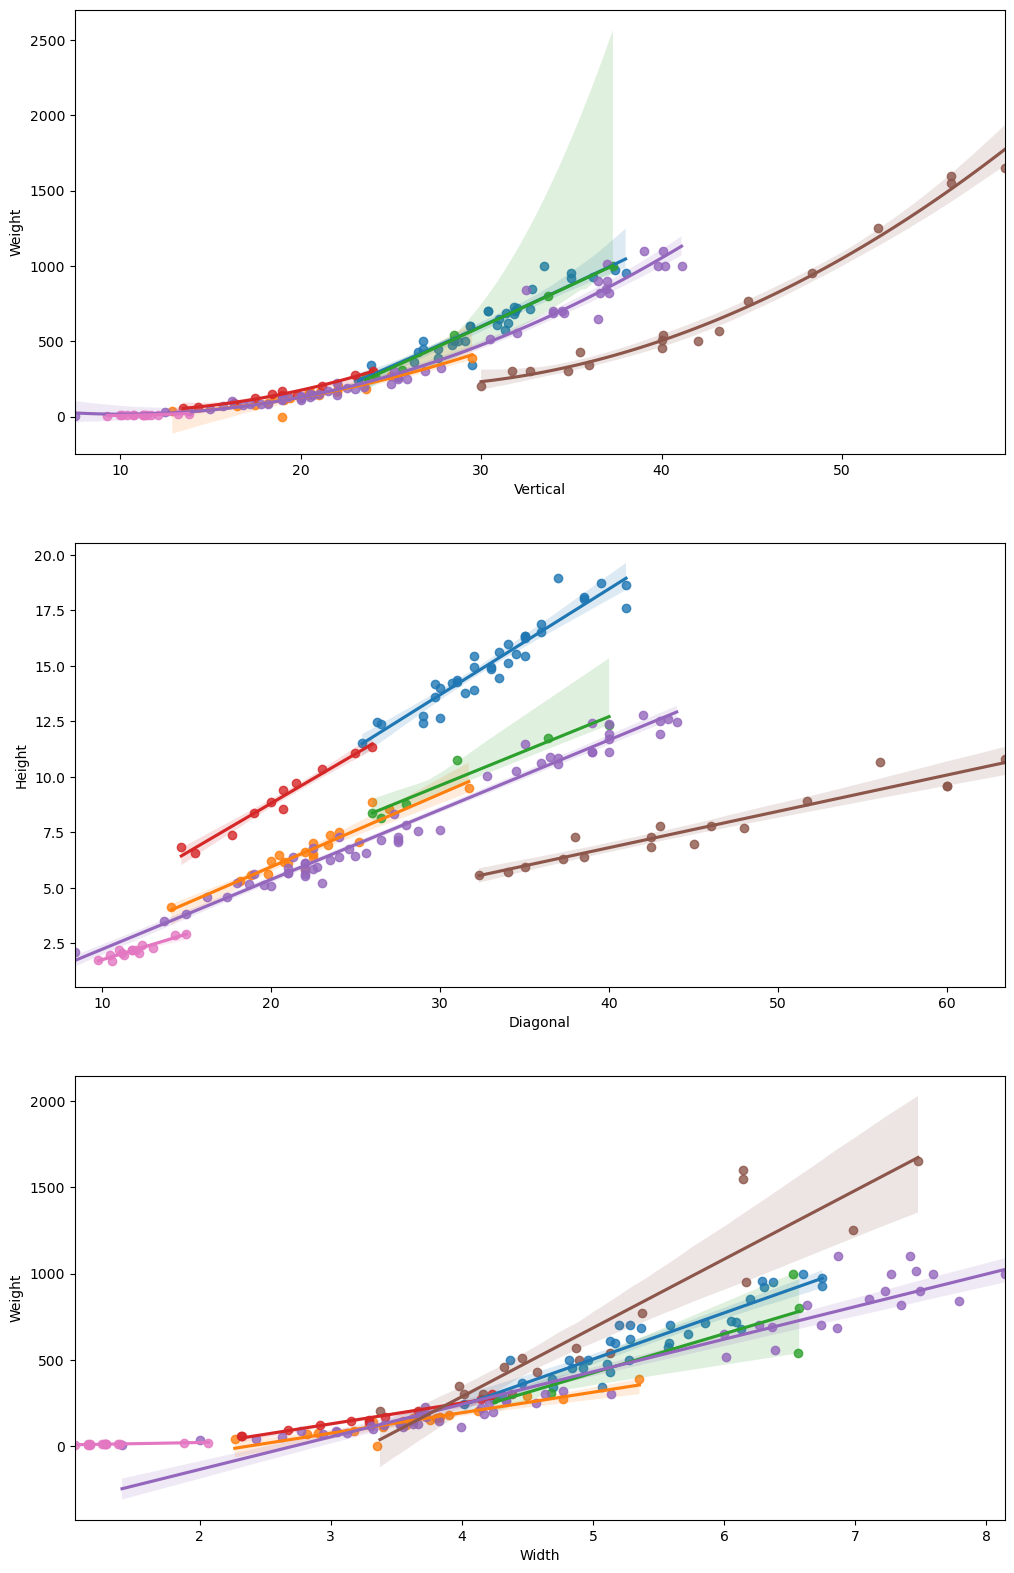

In [51]:
plt.rcParams['figure.figsize'] = [12, 20]

sizes1 = ["Vertical", "Diagonal", "Width"]
sizes2 = ["Weight", "Height", "Weight"]

fig, axes = plt.subplots(nrows=3, ncols=1)
for i, (size1, size2) in enumerate(zip(sizes1, sizes2)):
    for specie in df.Species.unique():
        if i == 0:
            sns.regplot(x=size1, y=size2, data=df.loc[df["Species"] == specie], order=2, ax=axes[i])
        else:
            sns.regplot(x=size1, y=size2, data=df.loc[df["Species"] == specie], order=1, ax=axes[i])

## Hypothese

Wenn wir auf die Vertikale Länge jeder Fischart schauen, unterscheiden sich die Fischarten nicht signifikant. Signifikanzniveau: 5 %

**Hypothese**: Unsere Fischarten haben die gleichen Mittelwerte bei dem Merkmal Vertikale Länge.

In [64]:
df_species = []
for specie in df.Species.unique():
    df_species.append(df.loc[df["Species"] == specie].drop(columns=["Species", "Vertical", "Cross"]))
res = stats.f_oneway(*df_species)
res

F_onewayResult(statistic=array([14.95248684, 39.61838421, 78.84596743, 23.46513207]), pvalue=array([2.11265310e-13, 9.53034394e-29, 3.70172329e-44, 1.64252856e-19]))

In [62]:
for df_specie in df_species:

F_onewayResult(statistic=array([14.95248684, 38.30409388, 39.61838421, 42.8787642 , 78.84596743,
       23.46513207]), pvalue=array([2.11265310e-13, 4.39075207e-28, 9.53034394e-29, 2.44417139e-30,
       3.70172329e-44, 1.64252856e-19]))

## Untersuchung mit Merkmal "Height"

## Lineare Regression

Versuche immer nur mit einer Fischart zu arbeiten. Ziel soll es sein, eine Lineare Regression für die Bestimmung (also y) von dem Gewicht zu machen. Dabei sollen die Merkmale Vertical, Height und Width verwendet werden.

* Lineare Regression für jede Fischart für das Gewicht ermitteln.
* Versuche auch die Regressionsgleichung zu notieren. 
* Falls ein Merkmal elimiert werden kann, schaue wie die Lösung aussieht. 
* Welcher Fisch kann mann zur Bestimmung anhand von dem Gewicht am Besten verwenden?
